<h1 align=center>Company's new branch in Bangalore</h1>

##Introduction

<b>1. Business Problem:</b>
<p>This project is for a company which is already established where there headquarters is located. Now they want to expand their business by constructing a new unit in Bangalore,INDIA which is considered as the IT hub and Silicon Valley of India, for which they need to find a plot which is reasonable but also surrounded by venues which will attract more talented employees and keeps the productivity high.</p>

<b>2. Data Section:</b>
<p>In this project we have used data from various sources for extracting different information.
<li>Firstly, we extracted data for area names in Bangalore,INDIA with it's average price per sqft in rupees.(
<link>https://www.makaan.com/price-trends/property-rates-for-buy-in-bangalore</link>) We used plot setion from this site as our project is about constructing new company.
<li>Secondly,we used Foursquare api for extracting neighborhood venues.
<li>And Finally we used a json file for boundaries of each area in Bangalore from here-(<link>https://raw.githubusercontent.com/datameet/PincodeBoundary/master/Bangalore/boundary.geojson</link>).

<b>3. Methodology:</b>
<p><b>a.</b> Data extraction for average price per sqft in rupees for plots in each locality of Bangalore</p>
<p><b>b.</b> Extracting Longitudes and Latitudes for localities mentioned in the dataframe. For this we have used geopy and Nominatim.</p>
<p><b>c.</b> Plotting each column data on map and bar plot for average price with respect to locality name.</p>
<p><b>d.</b> Collection of venues for each locality using Foursquare and creating a table for venue categories.</p>
<p><b>e.</b> Kmeans modelling</P>
<p><b>f.</b> Plotting the clusters on map using json data for boundaries of locality in Bangalore and choropleth for Average price per sqft of plots.</p>

<b>NOTE:</b><u>If the plots are't visible here please go through company_plots or Report_IBM_DScapstone

<b>a. Data Extraction.</b>

Importing necessary libraries

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image
from IPython.core.display import HTML
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
!pip install folium==0.5.0
import folium # plotting library
print('Folium installed')
print('Libraries imported.')

In [2]:
#uploading files from local computer which we have transformed according to need in excel and saved as csv file.
from google.colab import files
uploaded = files.upload()

Saving plotdataf.csv to plotdataf.csv


In [3]:
import io
df_avgp = pd.read_csv(io.BytesIO(uploaded['plotdataf.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df_avgp.head()

,Locality_Name,Avg_price_per_sqft
0,HSR Layout,20833.33
1,Koramangala,40959.90
2,Whitefield,17408.84
3,Krishnarajapura,5126.25
4,Begur,7571.43


Check the data types of columns and change it if required according to your project needs

In [5]:
df_avgp.dtypes

Locality_Name          object
Avg_price_per_sqft    float64
dtype: object

In [6]:
df_avgp['Avg_price_per_sqft'] = df_avgp['Avg_price_per_sqft'].astype(float, errors = 'raise')

In [7]:
df_avgp.dtypes

Locality_Name          object
Avg_price_per_sqft    float64
dtype: object

In [8]:
df_avgp.head()

,Locality_Name,Avg_price_per_sqft
0,HSR Layout,20833.33
1,Koramangala,40959.90
2,Whitefield,17408.84
3,Krishnarajapura,5126.25
4,Begur,7571.43


<b>b. Extracting Longitudes and Latitudes for each locality.<b/>

In [9]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

# declare an empty list to store
# latitude and longitude of values
# of city column
longitude = []
latitude = []

# function to find the coordinate
# of a given city
def findGeocode(city):
	
	# try and catch is used to overcome
	# the exception thrown by geolocator
	# using geocodertimedout
	try:
		
		# Specify the user_agent as your
		# app name it should not be none
		geolocator = Nominatim(user_agent="blore_coord")
		
		return geolocator.geocode(city)
	
	except GeocoderTimedOut:
		
		return findGeocode(city)	

# each value from city column
# will be fetched and sent to
# function find_geocode
for i in (df_avgp["Locality_Name"]):
	
	if findGeocode(i) != None:
		
		loc = findGeocode(i)
		
		# coordinates returned from
		# function is stored into
		# two separate list
		latitude.append(loc.latitude)
		longitude.append(loc.longitude)
	
	# if coordinate for a city not
	# found, insert "NaN" indicating
	# missing value
	else:
		latitude.append(np.nan)
		longitude.append(np.nan)
  
df_avgp["Longitude"] = longitude
df_avgp["Latitude"] = latitude
  
df_avgp.head(20)

,Locality_Name,Avg_price_per_sqft,Longitude,Latitude
0,HSR Layout,20833.33,77.638862,12.911623
1,Koramangala,40959.90,77.751926,13.292399
2,Whitefield,17408.84,-71.611858,44.373058
3,Krishnarajapura,5126.25,76.805633,12.032522
4,Begur,7571.43,3.208835,41.954192
5,Varthur,9534.09,77.746994,12.940615
6,Devanahalli,13611.17,77.713438,13.248350
7,Chandapura,4473.16,77.433391,17.443639
8,Mahadevapura,15922.58,77.692416,12.993498
9,Whitefield Hope Farm Junction,7500.00,77.752044,12.983974


Find if there is any missing values and drop it

In [10]:
missing_data = df_avgp.isnull()

In [11]:
for column in missing_data.columns.values.tolist():
 print(column)
 print (missing_data[column].value_counts())
 print("")

Locality_Name
False    606
Name: Locality_Name, dtype: int64

Avg_price_per_sqft
False    438
True     168
Name: Avg_price_per_sqft, dtype: int64

Longitude
False    488
True     118
Name: Longitude, dtype: int64

Latitude
False    488
True     118
Name: Latitude, dtype: int64



In [12]:
# simply drop whole row with NaN in "price" column
df_avgp.dropna(subset=["Avg_price_per_sqft"], axis=0, inplace=True)
# reset index, because we droped multiple rows
df_avgp.reset_index(drop=True, inplace=True)

In [13]:
missing_data = df_avgp.isnull()
for column in missing_data.columns.values.tolist():
 print(column)
 print (missing_data[column].value_counts())
 print("")

Locality_Name
False    438
Name: Locality_Name, dtype: int64

Avg_price_per_sqft
False    438
Name: Avg_price_per_sqft, dtype: int64

Longitude
False    374
True      64
Name: Longitude, dtype: int64

Latitude
False    374
True      64
Name: Latitude, dtype: int64



In [14]:
# simply drop whole row with NaN in "Longitude and Latitude" column
df_avgp.dropna(subset=["Longitude"], axis=0, inplace=True)
# reset index, because we droped multiple rows
df_avgp.reset_index(drop=True, inplace=True)

In [15]:
missing_data = df_avgp.isnull()
for column in missing_data.columns.values.tolist():
 print(column)
 print (missing_data[column].value_counts())
 print("")

Locality_Name
False    374
Name: Locality_Name, dtype: int64

Avg_price_per_sqft
False    374
Name: Avg_price_per_sqft, dtype: int64

Longitude
False    374
Name: Longitude, dtype: int64

Latitude
False    374
Name: Latitude, dtype: int64



In [16]:
df_avgp.head()

,Locality_Name,Avg_price_per_sqft,Longitude,Latitude
0,HSR Layout,20833.33,77.638862,12.911623
1,Koramangala,40959.90,77.751926,13.292399
2,Whitefield,17408.84,-71.611858,44.373058
3,Krishnarajapura,5126.25,76.805633,12.032522
4,Begur,7571.43,3.208835,41.954192


In [17]:
df_avgp.shape

(374, 4)

<b>c. Plotting each column data on map and bar plot for average price with respect to locality name.</b>

Extracting Longitude and Latitude for Bangalore and visualizing it and it's localities using Folium on map.

In [18]:
address = 'Bengaluru'
geolocator = Nominatim(user_agent="blore_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Bengaluru,INDIA are {} , {}.'.format(latitude, longitude))

The geographical coordinates of Bengaluru,INDIA are 12.9791198 , 77.5912997.


In [19]:
# create map of Bengaluru using latitude and longitude values
map_blore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, Locality_Name, Avg_price_per_sqft in zip(df_avgp['Latitude'], df_avgp['Longitude'], df_avgp['Locality_Name'], df_avgp['Avg_price_per_sqft']):
    label = '{}, {}'.format(Locality_Name, Avg_price_per_sqft)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_blore)  
    
map_blore

In [20]:
import plotly.express as px
import plotly.graph_objects as go

In [22]:
fig = px.bar(df_avgp, x="Locality_Name", y="Avg_price_per_sqft", title='Average price per Square feet for plots in INR for each area')
fig.show()

<b>d. Collection of venues for each locality using Foursquare and creating a table for venue categories.

In [23]:
CLIENT_ID = '310FHDPHB1SU3PW5DRQRIHTO5JVQMKS1XFGBUECP4MDQYOLU' # your Foursquare ID
CLIENT_SECRET = 'ZQL1JQDGB0YHOBTLXWBVZUXJT5UO44O2JFKVILHH00AW4POQ' # your Foursquare Secret
ACCESS_TOKEN = '2E5INOMQQF1VDAXHL13MS2BTSV1BEMG1JBJLLIQ2Y125ENEE' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 310FHDPHB1SU3PW5DRQRIHTO5JVQMKS1XFGBUECP4MDQYOLU
CLIENT_SECRET:ZQL1JQDGB0YHOBTLXWBVZUXJT5UO44O2JFKVILHH00AW4POQ


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality_name', 
                  'Locality_Latitude', 
                  'Locality_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)
# Run the above function on each location and create a new dataframe called location_venues and display it.
location_venues = getNearbyVenues(names=df_avgp['Locality_Name'],
                                   latitudes=df_avgp['Latitude'],
                                   longitudes=df_avgp['Longitude']
                                  )

HSR Layout
Koramangala
Whitefield
Krishnarajapura
Begur
Varthur
Devanahalli
Chandapura
Mahadevapura
Whitefield Hope Farm Junction
Budigere Cross
Bellandur
Jakkur
Marathahalli
Yelahanka
Jigani
Indira Nagar
Murugeshpalya
Horamavu
BTM Layout
Electronic City Phase 1
RR Nagar
Thanisandra
Banashankari
Chandapura Anekal Road
Kalyan Nagar
Electronic City Phase 2
Nelamangala
Harlur
Subramanyapura
Banaswadi
Hebbal
Bagaluru Near Yelahanka
Narayanapura
Sarjapur
Nagarbhavi
Ramamurthy Nagar
Talaghattapura
Rajajinagar
Bommanahalli
Chikkanayakanahalli
Attibele
Brookefield
Bommasandra
Kadugodi
Gottigere
Kogilu
Kasavanahalli
Uttarahalli
Jalahalli
Hulimavu
Avalahalli
CV Raman Nagar
Ramagondanahalli
Kengeri
Chamrajpet
Hoskote
Konanakunte
Kannamangala
Vidyaranyapura
Yeshwantpur
hebbal kempapura
New Thippasandra
Kaggadasapura
Vijayanagar
Kasturi Nagar
Kumaraswamy Layout
Hennur Main Road
Jeevan Bima Nagar
Marsur
Singasandra
Basavanagudi
JP Nagar Phase 7
J. P. Nagar
Electronics City
Hennur
Anekal City
Bagalur

In [25]:
location_venues.head(10)

,Locality_name,Locality_Latitude,Locality_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,HSR Layout,12.911623,77.638862,House of Commons,12.911994,77.638938,Pub
1,HSR Layout,12.911623,77.638862,Here & Now,12.913618,77.638243,Burger Joint
2,HSR Layout,12.911623,77.638862,Once Upon A Flame,12.911928,77.638054,Steakhouse
3,HSR Layout,12.911623,77.638862,Cream Stone,12.912336,77.638581,Ice Cream Shop
4,HSR Layout,12.911623,77.638862,Shree Sweets,12.914206,77.640986,Snack Place
5,HSR Layout,12.911623,77.638862,Calvins,12.912182,77.637661,Café
6,HSR Layout,12.911623,77.638862,The Punjabi Rasoi,12.911959,77.638425,Punjabi Restaurant
7,HSR Layout,12.911623,77.638862,Anjappar,12.914338,77.637159,Chettinad Restaurant
8,HSR Layout,12.911623,77.638862,Baskin-Robbins,12.911906,77.638279,Ice Cream Shop
9,HSR Layout,12.911623,77.638862,49ParanthaGali,12.912309,77.638569,North Indian Restaurant


In [26]:
loc_count = location_venues.groupby('Locality_name').count()

In [27]:
loc_count = loc_count.reset_index()
loc_count.head()

,Locality_name,Locality_Latitude,Locality_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,5th Phase,5,5,5,5,5,5
1,AECS Layout,17,17,17,17,17,17
2,AECS Layout A Block Singasandra,2,2,2,2,2,2
3,Abbigere,3,3,3,3,3,3
4,Allalasandra,3,3,3,3,3,3


In [28]:
#Creating Bar chart for number of venue categories for each location
fig = px.bar(loc_count, x="Locality_name", y="Venue_Category", title='Venue category counts for each locality of Bengaluru')
fig.show()

In [29]:
# get the List of Unique Categories
print('There are {} uniques categories.'.format(len(location_venues['Venue_Category'].unique())))

There are 250 uniques categories.


In [30]:
# one hot encoding
venues_onehot = pd.get_dummies(location_venues[['Venue_Category']], prefix="", prefix_sep="")

# add Locality name column back to dataframe
venues_onehot['Locality_name'] = location_venues['Locality_name'] 

# move Locality name column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])

#fixed_columns
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Locality_name,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Basketball Court,Bathing Area,Beach,Beer Bar,Beer Garden,Belgian Restaurant,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,...,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tapas Restaurant,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Shop,Women's Store
0,HSR Layout,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HSR Layout,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HSR Layout,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HSR Layout,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HSR Layout,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
blore_grouped = venues_onehot.groupby('Locality_name').mean().reset_index()
blore_grouped.head(10)

,Locality_name,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Basketball Court,Bathing Area,Beach,Beer Bar,Beer Garden,Belgian Restaurant,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,...,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tapas Restaurant,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Shop,Women's Store
0,5th Phase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,AECS Layout,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.00,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0
2,AECS Layout A Block Singasandra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Abbigere,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Allalasandra,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,Amruthahalli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6,Anekal Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7,Annapurneshwari Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [32]:
blore_grouped.shape

(252, 251)

In [33]:
num_top_venues = 5

for hood in blore_grouped['Locality_name']:
    print("----"+hood+"----")
    temp = blore_grouped[blore_grouped['Locality_name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----5th Phase----
               venue  freq
0  Indian Restaurant   0.6
1        Snack Place   0.2
2        Bus Station   0.2
3                ATM   0.0
4        Music Venue   0.0


----AECS Layout----
                     venue  freq
0        Indian Restaurant  0.24
1         Department Store  0.12
2                   Bakery  0.06
3                    Diner  0.06
4  South Indian Restaurant  0.06


----AECS Layout A Block Singasandra----
                venue  freq
0                Lake   0.5
1   Kerala Restaurant   0.5
2                 ATM   0.0
3         Men's Store   0.0
4  Mexican Restaurant   0.0


----Abbigere----
                 venue  freq
0     Business Service  0.33
1               Bakery  0.33
2  Indie Movie Theater  0.33
3        Moving Target  0.00
4          Music Venue  0.00


----Allalasandra----
                       venue  freq
0                        ATM   1.0
1                Music Venue   0.0
2              Metro Station   0.0
3         Mexican Restaurant   0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                       venue  freq
0           Department Store   1.0
1                        ATM   0.0
2               Neighborhood   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----Doddajala----
                venue  freq
0               Hotel   0.5
1            Mountain   0.5
2                 ATM   0.0
3        Neighborhood   0.0
4  Mexican Restaurant   0.0


----Doddakannelli----
                     venue  freq
0        Indian Restaurant  0.50
1       Seafood Restaurant  0.25
2  North Indian Restaurant  0.25
3                      ATM  0.00
4            Movie Theater  0.00


----Doddanagamangala----
                       venue  freq
0       Gym / Fitness Center   1.0
1                        ATM   0.0
2               Neighborhood   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----Dollars Colony----
                       venue  freq
0                 Shoe Store   1.0
1                        ATM   0.0
2            

In [35]:
# Define a function to return the most common venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [37]:
# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Locality_name'] = blore_grouped['Locality_name']

for ind in np.arange(blore_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(blore_grouped.iloc[ind, :], num_top_venues)

In [38]:
venues_sorted.head()

,Locality_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5th Phase,Indian Restaurant,Snack Place,Bus Station,Women's Store,Doner Restaurant,Fish Market,Field,Fast Food Restaurant,Farmers Market,Fabric Shop
1,AECS Layout,Indian Restaurant,Department Store,Bakery,Salon / Barbershop,Breakfast Spot,Udupi Restaurant,Coffee Shop,South Indian Restaurant,Tea Room,Diner
2,AECS Layout A Block Singasandra,Lake,Kerala Restaurant,Women's Store,Flower Shop,Fishing Store,Fish Market,Field,Fast Food Restaurant,Farmers Market,Fabric Shop
3,Abbigere,Business Service,Bakery,Indie Movie Theater,Doner Restaurant,Fishing Store,Fish Market,Field,Fast Food Restaurant,Farmers Market,Fabric Shop
4,Allalasandra,ATM,Doner Restaurant,Flea Market,Fishing Store,Fish Market,Field,Fast Food Restaurant,Farmers Market,Fabric Shop,Event Service


In [42]:
venues_sorted.shape

(252, 11)

In [43]:
blore_grouped.shape

(252, 251)

<b>e. Kmeans Modelling.

In [40]:
from sklearn.cluster import KMeans

In [44]:
k_val = blore_grouped.drop(['Locality_name'],axis='columns')
k_val.head()

,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Basketball Court,Bathing Area,Beach,Beer Bar,Beer Garden,Belgian Restaurant,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,...,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tapas Restaurant,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Shop,Women's Store
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [45]:
import matplotlib.pyplot as plt

Finding the best k value for Kmeans clustering.

In [57]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(k_val)
    Sum_of_squared_distances.append(km.inertia_)

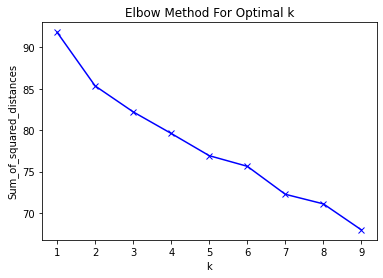

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [59]:
#Distribute in 5 Clusters

# set number of clusters
kclusters = 5

blore_grouped_clustering = blore_grouped.drop('Locality_name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(blore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50]

array([2, 4, 0, 0, 1, 4, 0, 4, 0, 0, 4, 4, 1, 4, 4, 0, 2, 4, 4, 0, 4, 0,
       0, 4, 2, 4, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 4, 4, 4, 0,
       0, 4, 0, 2, 0, 4], dtype=int32)

In [60]:
# add clustering labels to venues data
venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

blore_merged = df_avgp

#Merging the data with lat and long from original dataframe with venue data on Locality Name
blore_merged = blore_merged.join(venues_sorted.set_index('Locality_name'), on='Locality_Name')

blore_merged.head()

,Locality_Name,Avg_price_per_sqft,Longitude,Latitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,HSR Layout,20833.33,77.638862,12.911623,4.0,Indian Restaurant,Ice Cream Shop,Café,Snack Place,Liquor Store,Farmers Market,Seafood Restaurant,Food Court,Coffee Shop,Lounge
1,Koramangala,40959.90,77.751926,13.292399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Whitefield,17408.84,-71.611858,44.373058,0.0,Pizza Place,Sandwich Place,Donut Shop,Gun Shop,Grocery Store,Convenience Store,Women's Store,Electronics Store,Dumpling Restaurant,Duty-free Shop
3,Krishnarajapura,5126.25,76.805633,12.032522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Begur,7571.43,3.208835,41.954192,0.0,Mediterranean Restaurant,Hotel,Tapas Restaurant,Spanish Restaurant,Cocktail Bar,Pub,Athletics & Sports,Bar,Bakery,Café


In [61]:
# simply drop whole row with NaN in "price" column
blore_merged.dropna(subset=["Cluster_Labels"], axis=0, inplace=True)
# reset index, because we droped two rows
blore_merged.reset_index(drop=True, inplace=True)

In [62]:
missing_data1 = blore_merged.isnull()
for column in missing_data1.columns.values.tolist():
 print(column)
 print (missing_data1[column].value_counts())
 print("")

Locality_Name
False    255
Name: Locality_Name, dtype: int64

Avg_price_per_sqft
False    255
Name: Avg_price_per_sqft, dtype: int64

Longitude
False    255
Name: Longitude, dtype: int64

Latitude
False    255
Name: Latitude, dtype: int64

Cluster_Labels
False    255
Name: Cluster_Labels, dtype: int64

1st Most Common Venue
False    255
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
False    255
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
False    255
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
False    255
Name: 4th Most Common Venue, dtype: int64

5th Most Common Venue
False    255
Name: 5th Most Common Venue, dtype: int64

6th Most Common Venue
False    255
Name: 6th Most Common Venue, dtype: int64

7th Most Common Venue
False    255
Name: 7th Most Common Venue, dtype: int64

8th Most Common Venue
False    255
Name: 8th Most Common Venue, dtype: int64

9th Most Common Venue
False    255
Name: 9th Most Common Venue, dtype: i

In [63]:
blore_merged.head(10)

,Locality_Name,Avg_price_per_sqft,Longitude,Latitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,HSR Layout,20833.33,77.638862,12.911623,4.0,Indian Restaurant,Ice Cream Shop,Café,Snack Place,Liquor Store,Farmers Market,Seafood Restaurant,Food Court,Coffee Shop,Lounge
1,Whitefield,17408.84,-71.611858,44.373058,0.0,Pizza Place,Sandwich Place,Donut Shop,Gun Shop,Grocery Store,Convenience Store,Women's Store,Electronics Store,Dumpling Restaurant,Duty-free Shop
2,Begur,7571.43,3.208835,41.954192,0.0,Mediterranean Restaurant,Hotel,Tapas Restaurant,Spanish Restaurant,Cocktail Bar,Pub,Athletics & Sports,Bar,Bakery,Café
3,Varthur,9534.09,77.746994,12.940615,2.0,Indian Restaurant,Women's Store,Dog Run,Fishing Store,Fish Market,Field,Fast Food Restaurant,Farmers Market,Fabric Shop,Event Service
4,Devanahalli,13611.17,77.713438,13.248350,0.0,Campground,Women's Store,Dog Run,Fishing Store,Fish Market,Field,Fast Food Restaurant,Farmers Market,Fabric Shop,Event Service
5,Mahadevapura,15922.58,77.692416,12.993498,0.0,Movie Theater,Coffee Shop,Women's Store,Bar,Italian Restaurant,French Restaurant,Fast Food Restaurant,Multiplex,Noodle House,Convenience Store
6,Whitefield Hope Farm Junction,7500.00,77.752044,12.983974,4.0,Intersection,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Breakfast Spot,Restaurant,Department Store,Doner Restaurant,Donut Shop,Dumpling Restaurant
7,Budigere Cross,3723.50,77.750307,13.046410,0.0,Bus Stop,Women's Store,Fishing Store,Fish Market,Field,Fast Food Restaurant,Farmers Market,Fabric Shop,Event Service,Electronics Store
8,Marathahalli,6999.50,77.698416,12.955257,4.0,Indian Restaurant,Clothing Store,Asian Restaurant,Shoe Store,South Indian Restaurant,Kerala Restaurant,Sporting Goods Shop,Restaurant,Bakery,Lounge
9,Yelahanka,8638.38,77.596345,13.100698,4.0,ATM,Train Station,Indian Restaurant,Mobile Phone Shop,Food Truck,Farmers Market,Fabric Shop,Fast Food Restaurant,Doner Restaurant,Field


<b>f. Plotting the clusters on map using json data for boundaries of locality in Bangalore and choropleth for Average price per sqft of plots.</b>

In [64]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [65]:
!wget --quiet https://raw.githubusercontent.com/datameet/PincodeBoundary/master/Bangalore/boundary.geojson
print('bengaluru json file downloaded')

bengaluru json file downloaded


In [66]:
blore_json = r'boundary.geojson'

In [67]:
blore_merged.columns = list(map(str, blore_merged.columns))

In [89]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

#Creating choropleth using json data from above steps
map_clusters.choropleth( 
        geo_data=blore_json,
        data=df_avgp,
        columns=['Locality_Name',"Avg_price_per_sqft"],
        key_on='feature.properties.area_name',
        threshold_scale=[0, 5000, 10000, 40000, 60000],
        fill_color='YlOrRd',
        fill_opacity=0.8,
        line_opacity=0.5,
        legend_name='Average price per sqft in INR'
        )

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blore_merged['Latitude'],blore_merged['Longitude'], blore_merged['Locality_Name'],blore_merged['Cluster_Labels']):
   label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
   folium.CircleMarker(
                 [lat, lon],
                 radius=5,
                 popup=label,
                 color=rainbow[int(cluster)-1],
                 fill=True,
                 fill_color=rainbow[int(cluster)-1],
                 fill_opacity=0.7).add_to(map_clusters)

map_clusters

Creating a Line_polar plot to see which cluster has the maximum venues.

In [86]:
blore_grouped_clustering['label']=kmeans.labels_
polar=blore_grouped_clustering.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig.show()

To check which clusters have maximum counts via pie chart. 

In [87]:
pie=blore_grouped_clustering.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green','cyan','orange'])

<b>4. Results</b>
<p>Finally we will conclude with results in this section:</p>
<p>We need to consider two facts here:
<li> Average price per sqft in INR for each locality</li>
<li> Number of venues available at each locality</li>
<p>With respect to above observations we may say that prices are almost equal around the city other than couple of locality where prices are at peak.</p>
<p>We can also say that cluster 4 considers the highest venues with help of line_polar and pie plots. Cluster 4 can be seen in the maximum around south, east and central-north Bangalore. Any of these places might be suitable for new office space considering many other established companies and startups are also set up here.</p>
<p>Please note that plot selection of different companies may depend on many other factors, so other deep research is also required based on company requirements.</p>